![Airbnb](New_York_city_.png)

<b>Context</b>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

<b>Content</b>

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

<b>Acknowledgements</b>
This public dataset is part of Airbnb, and the original source can be found on this website.

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
nyc_df = pd.read_csv('AB_NYC_2019.csv')

In [6]:
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Indentifying and Replacing Missing Values

In [8]:
##Rows with missing value for last_review

nyc_df['last_review'].isnull().value_counts() 

False    38843
True     10052
Name: last_review, dtype: int64

In [9]:
##Rows with missing value for reviews_per_month

nyc_df['reviews_per_month'].isnull().value_counts() 

False    38843
True     10052
Name: reviews_per_month, dtype: int64

In [10]:
nyc_df['reviews_per_month'] = nyc_df['reviews_per_month'].fillna(0.0)

In [11]:
## We have replaced all the missing reviews_per_month with a 0.0

nyc_df['reviews_per_month']

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

<b>Note:</b> We can deal with missing data in the reviews_per_month column but we do not have a way to deal with missing data in the last_review column

# Identifying Key Features in the data

<AxesSubplot:>

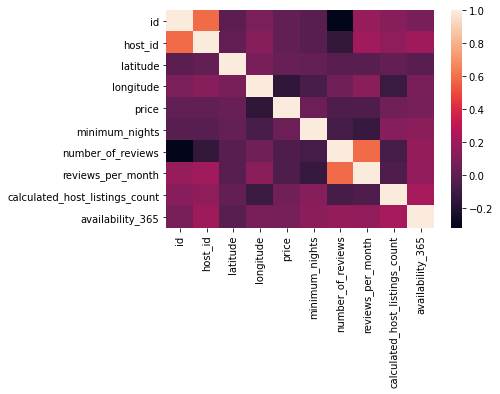

In [12]:
sns.heatmap(nyc_df.corr())

There does not appear to be any significant correlation between variables

# Neighbourhood Analysis

In [12]:
nyc_df['neighbourhood'].value_counts() 

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Rossville                1
Fort Wadsworth           1
Woodrow                  1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

### Top 10 neighbourhoods with the most listings

In [13]:
nyc_df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<b> Williamsburg has the most Airbnb Listings </b>

In [111]:
# Identifying the average listing price for each neighbourhood (rounded to 2 decimal places)
nbhd = nyc_df.groupby('neighbourhood')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd = nbhd.to_frame()

# Identifying the average number of reviews for each neighbourhood (rounded to 2 decimal places)
nbhd['average_number_of_reviews'] = nyc_df.groupby('neighbourhood')['number_of_reviews'].mean().round(2)

nbhd.head()

,price,average_number_of_reviews
neighbourhood,,
Allerton,87.60,42.93
Arden Heights,67.25,7.75
Arrochar,115.00,14.62
Arverne,171.78,29.26
Astoria,117.19,21.46


In [112]:
#Searching for the neighbour based on average price
search_value_price = 300
search_nbhd = nbhd[nbhd['price']>search_value_price]
search_nbhd

,price,average_number_of_reviews
neighbourhood,,
Battery Park City,367.56,8.29
Flatiron District,341.92,17.74
Fort Wadsworth,800.00,0.00
Prince's Bay,409.50,5.75
Randall Manor,336.00,18.00
Riverdale,442.09,26.64
Sea Gate,487.86,1.43
Tribeca,490.64,11.49
Woodrow,700.00,0.00


Text(0.5, 1.0, 'Number of Reviews vs. Price: Aggregated by neighbourhood average')

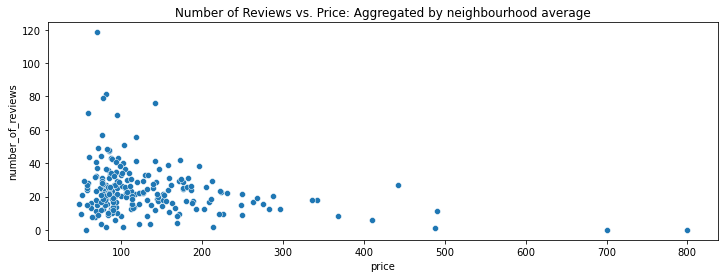

In [106]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='number_of_reviews',x='price', data=nbhd)
plt.title("Number of Reviews vs. Price: Aggregated by neighbourhood average")

We see that once the data is aggregated by neighbourhood averages, there is still a larger number of reviews left for the less expensive listings as compared to the more expensive ones.

## Neighbourhood Groups

In [113]:
nyc_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='price',x='neighbourhood_group', data=nyc_df)


In [114]:
# Identifying the average listing price for each neighbourhood (rounded to 2 decimal places)
nbhd_group = nyc_df.groupby('neighbourhood_group')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd_group = nbhd_group.to_frame()

# Identifying the average number of reviews for each neighbourhood group(rounded to 2 decimal places)
nbhd_group['total_number_of_reviews'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)

nbhd_group['number_of_listings'] = nyc_df['neighbourhood_group'].value_counts()

#Ratio of reviews as compared to total number of listings for each neighbourhood group
nbhd_group['ratio'] = (nbhd_group['total_number_of_reviews']/nbhd_group['number_of_listings']).round(2)


nbhd_group.head()

,price,total_number_of_reviews,number_of_listings,ratio
neighbourhood_group,,,,
Bronx,87.50,28371,1091,26.00
Brooklyn,124.38,486574,20104,24.20
Manhattan,196.88,454569,21661,20.99
Queens,99.52,156950,5666,27.70
Staten Island,114.81,11541,373,30.94


We notice something interesting in the data here:

- Staten island has the largest number of reviews as compared to the actual number of listings, which indicates that reviews were left more frequently for stays in listings that were within the Staten island neighbourhood group.
- Manhattan has the second largest number of listings but has the least number of reviews compared to the actual number of listings, which indicates that reviews are left less frequently for stays in the Manhattan neighbourhood group. The average listing price is also the highest which could acctond for this data


# Room Type Analysis

In [13]:
nyc_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='count'>

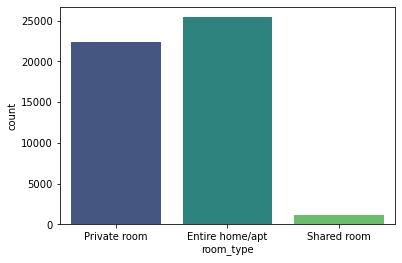

In [34]:
sns.countplot(x='room_type',data=nyc_df,palette='viridis')

<b>The majority of the listings are Entire home/apts or Private rooms</b>

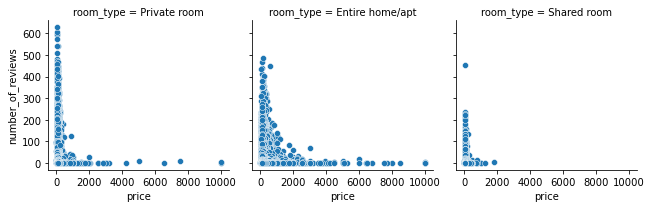

In [110]:
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(nyc_df, col ='room_type')

# map the above form facetgrid with some attributes
graph.map(sns.scatterplot, "price","number_of_reviews").add_legend()
# show the object
plt.show()

There are more reviews for less expensive listings regarless of the room types

# Examining Monthly Patterns

In [14]:
nyc_df['last_review'] = pd.to_datetime(nyc_df['last_review'])

In [15]:
nyc_df['Month'] = nyc_df['last_review'].apply(lambda time: time.month)

In [16]:
#nyc_df['Month'] = nyc_df['Month'].fillna(0.0)

In [17]:
#We needs to convert the values in the Month column from numbers to names of Months. We use "Unbooked" to indicate the unbooked rentals

dmap = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [18]:
#Mapping our new dictionary to the Month column in the Dataframe

nyc_df['Month'] = nyc_df['Month'].map(dmap)

In [33]:
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,October
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,May
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,July
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,November


Text(0.5, 1.0, 'Airbnb Listings each Month')

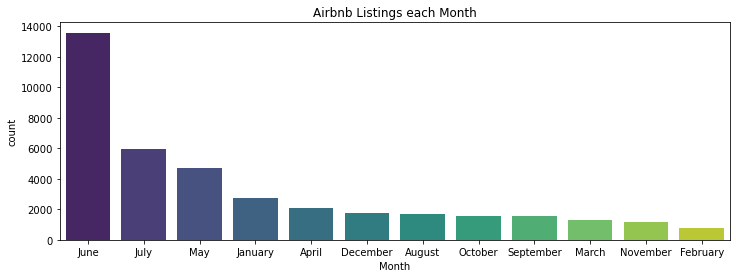

In [20]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

# We use order = nyc_df['Month'].value_counts().index to help us sort the count plot by the value counts

sns.countplot(x='Month',data=nyc_df,order = nyc_df['Month'].value_counts().index,palette='viridis')
plt.title("Airbnb Listings each Month")

The majority of reviews are left in the month of <b>June</b> which indicated that the majority of customers used a rental in June.

# Examining relationship with listing prices

Text(0.5, 1.0, 'Reviews per month vs. Price')

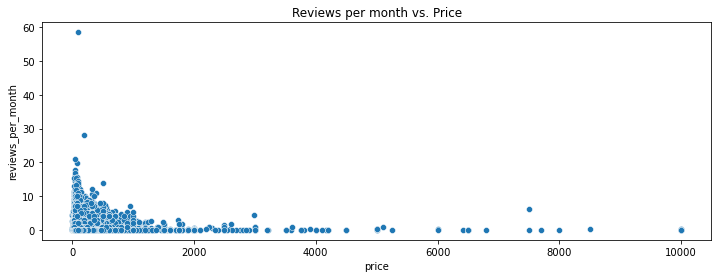

In [26]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='reviews_per_month',x='price', data=nyc_df)
plt.title("Reviews per month vs. Price")

Text(0.5, 1.0, 'Number of Reviews vs. Price')

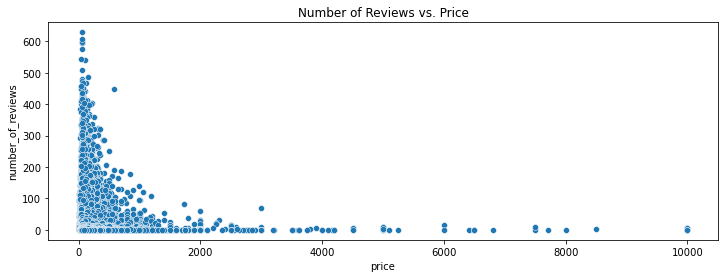

In [25]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='number_of_reviews',x='price', data=nyc_df)
plt.title("Number of Reviews vs. Price")

Based on the plot we can see that the majority of more expensive listings recieve fewers reviews as compared 

# Exporting the data

In [ ]:
#Exporting the dataset (without the index values)
#nyc_df.to_csv('Airbnb.csv', index=False)